In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
#import math

def exact_sol(x, t):
    return np.exp(-np.pi**2 * t) * np.sin(np.pi*x)/np.pi + t*x*(1-x)



# Task 2

In [6]:
# implicit method
def task2(filename: str):
    # ---------Знач----------

    f = open(filename + "_pars", "r")
    N, L, x_step, t_step = f.readline().split()
    N, L, x_step, t_step = int(N), int(L), float(x_step), float(t_step)
    f.close()
    df_expl = pd.read_csv(filename + '_vals.csv')
    for i in range(0, L, L//10):
        plt.plot(df_expl['x'][i*(N+1):(i+1)*(N+1)], df_expl['u']
                 [i*(N+1):(i+1)*(N+1)], color='b', alpha=i/L)
    # plt.plot(df_expl['x'][0:N], df_expl['u'][0:N])
    plt.title(f'Задание 2 (Знач в разные мом вр). {
              N+1}x{L+1} узлов\nx_step={x_step}, t_step={t_step}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.show()

    # ---------Погр----------

    for i in range(0, L, L//10):
        u_vals = exact_sol(
            df_expl['x'][i*(N+1):(i+1)*(N+1)], df_expl['t'][i*(N+1)])
        delta_u = np.abs(u_vals - df_expl['u'][i*(N+1):(i+1)*(N+1)])
        plt.plot(df_expl['x'][i*(N+1):(i+1)*(N+1)], delta_u, color='b',
                 alpha=(i+1)/L, label=f'{round(df_expl["t"][i*(N+1)], 3)}')
    # plt.plot(df_expl['x'][0:N], df_expl['u'][0:N])
    # plt.plot(df_expl['x'][0*(N+1):(0+1)*(N+1)], df_expl['u'][0*(N+1):(0+1)*(N+1)], color='r', alpha=1)
    plt.title(f'Задание 2 (Погр в разные мом вр). {
              N+1}x{L+1} узлов\nx_step={x_step}, t_step={t_step}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.legend()
    plt.show()

    # ---------Погр2---------

    time_arr = np.zeros(L)
    delta_arr = np.zeros(L)
    for i in range(0, L):
        u_vals = exact_sol(
            df_expl['x'][i*(N+1):(i+1)*(N+1)], df_expl['t'][i*(N+1)])
        delta_u = np.max(np.abs(u_vals - df_expl['u'][i*(N+1):(i+1)*(N+1)]))
        time_arr[i] = df_expl['t'][i*(N+1)]
        delta_arr[i] = delta_u
    print(f'{len(time_arr)}__{len(delta_arr)}')
    plt.plot(time_arr, delta_arr)
    plt.title(f'Задание 2 (Зависимость погр от вр). {
              N+1}x{L+1} узлов\nx_step={x_step}, t_step={t_step}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.legend()
    plt.show()

    # -------------------
    """
    for i in range(0,L,L//10):
        u_vals = exact_sol(df_expl['x'][i*(N+1):(i+1)*(N+1)], df_expl['t'][i*(N+1)])
        plt.plot(df_expl['x'][i*(N+1):(i+1)*(N+1)], u_vals, color='b', alpha=i/L)
    plt.title(f'Проверка (Знач в разные мом вр). {N+1}x{L+1} узлов')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.show()
    df_expl.info()
    """

In [7]:
# Crank-Nicolson method
def task3(filename: str):
    # ---------Знач----------

    f = open(filename + "_pars", "r")
    N, L, x_step, t_step = f.readline().split()
    N, L, x_step, t_step = int(N), int(L), float(x_step), float(t_step)
    f.close()
    df_expl = pd.read_csv(filename + '_vals.csv')
    for i in range(0, L, L//10):
        plt.plot(df_expl['x'][i*(N+1):(i+1)*(N+1)], df_expl['u']
                 [i*(N+1):(i+1)*(N+1)], color='b', alpha=i/L)
    # plt.plot(df_expl['x'][0:N], df_expl['u'][0:N])
    plt.title(f'Задание 2* (Знач в разные мом вр). {N+1}x{
              L+1} узлов\nx_step={x_step}, t_step={t_step}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.show()

    # ---------Погр----------

    for i in range(0, L, L//10):
        u_vals = exact_sol(
            df_expl['x'][i*(N+1):(i+1)*(N+1)], df_expl['t'][i*(N+1)])
        delta_u = np.abs(u_vals - df_expl['u'][i*(N+1):(i+1)*(N+1)])
        plt.plot(df_expl['x'][i*(N+1):(i+1)*(N+1)], delta_u, color='b',
                 alpha=(i+1)/L, label=f'{round(df_expl["t"][i*(N+1)], 3)}')
    # plt.plot(df_expl['x'][0:N], df_expl['u'][0:N])
    # plt.plot(df_expl['x'][0*(N+1):(0+1)*(N+1)], df_expl['u'][0*(N+1):(0+1)*(N+1)], color='r', alpha=1)
    plt.title(f'Задание 2* (Погр в разные мом вр). {N+1}x{
              L+1} узлов\nx_step={x_step}, t_step={t_step}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.legend()
    plt.show()

    # ---------Погр2---------

    time_arr = np.zeros(L)
    delta_arr = np.zeros(L)
    for i in range(0, L):
        u_vals = exact_sol(
            df_expl['x'][i*(N+1):(i+1)*(N+1)], df_expl['t'][i*(N+1)])
        delta_u = np.max(np.abs(u_vals - df_expl['u'][i*(N+1):(i+1)*(N+1)]))
        time_arr[i] = df_expl['t'][i*(N+1)]
        delta_arr[i] = delta_u
    print(f'{len(time_arr)}__{len(delta_arr)}')
    plt.plot(time_arr, delta_arr)
    plt.title(f'Задание 2* (Зависимость погр от вр). {N+1}x{
              L+1} узлов\nx_step={x_step}, t_step={t_step}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.legend()
    plt.show()

    # -------------------
    """
    for i in range(0,L,L//10):
        u_vals = exact_sol(df_expl['x'][i*(N+1):(i+1)*(N+1)], df_expl['t'][i*(N+1)])
        plt.plot(df_expl['x'][i*(N+1):(i+1)*(N+1)], u_vals, color='b', alpha=(i+1)/L)
    plt.title(f'Проверка (Знач в разные мом вр). {N+1}x{L+1} узлов')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.show()
    df_expl.info()    
    """

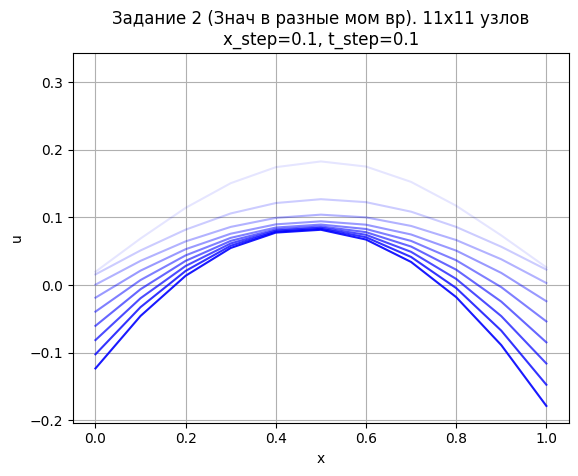

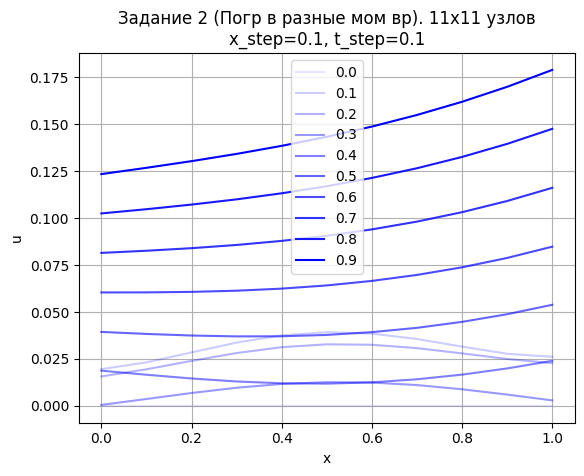

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


10__10


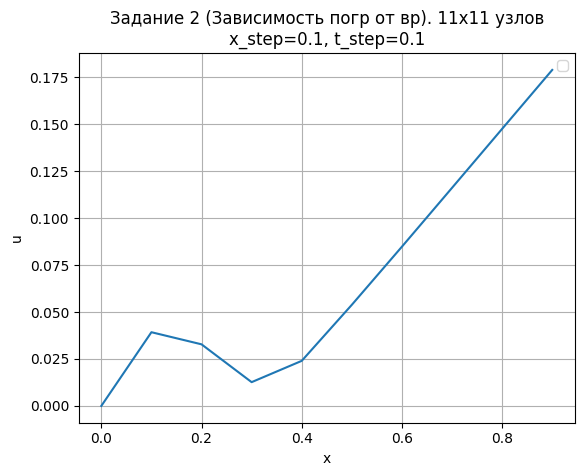

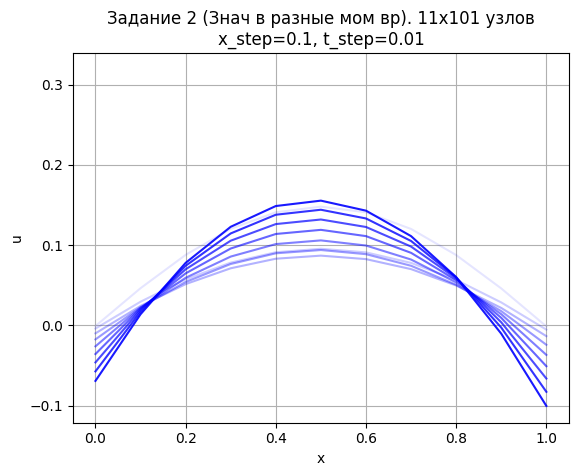

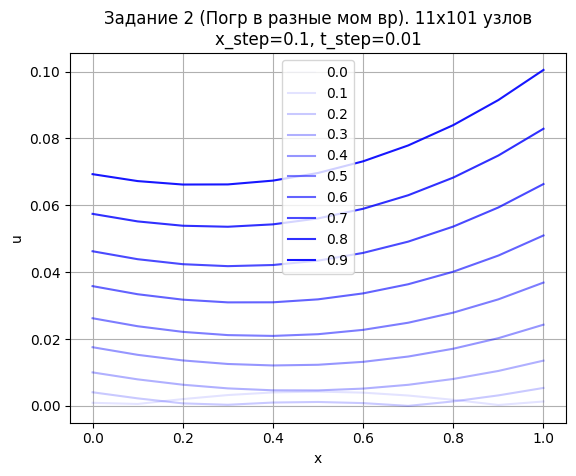

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


100__100


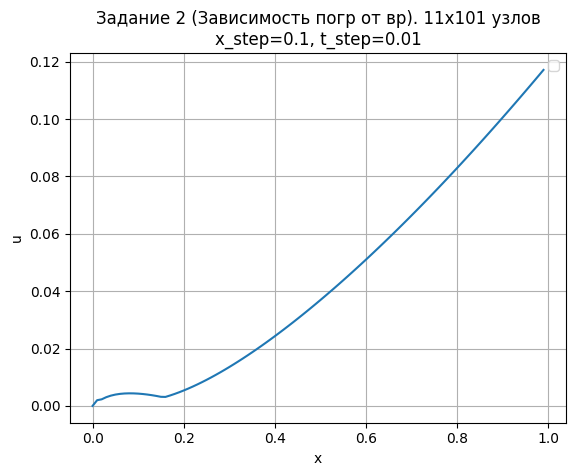

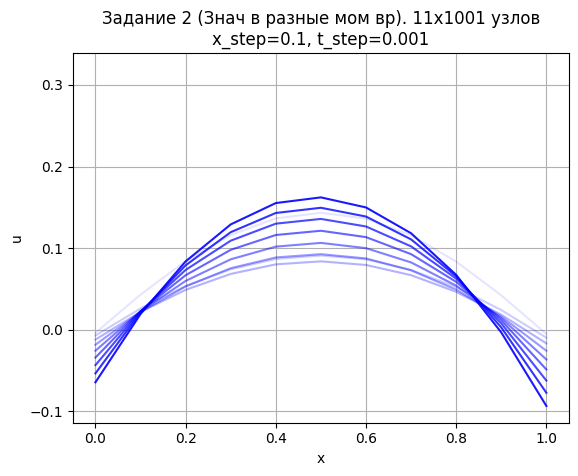

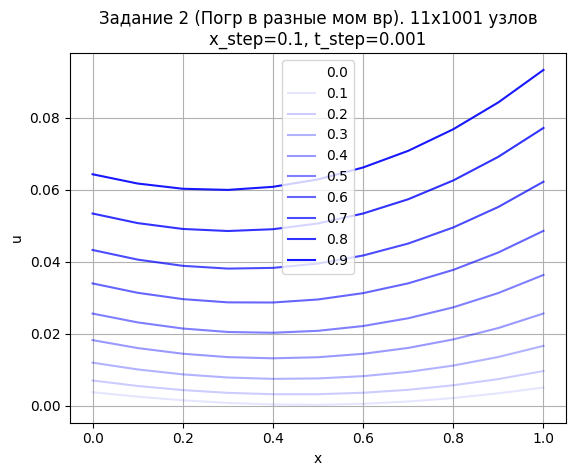

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000__1000


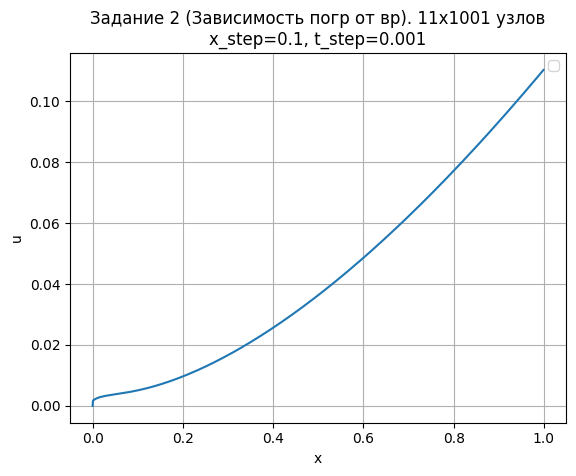

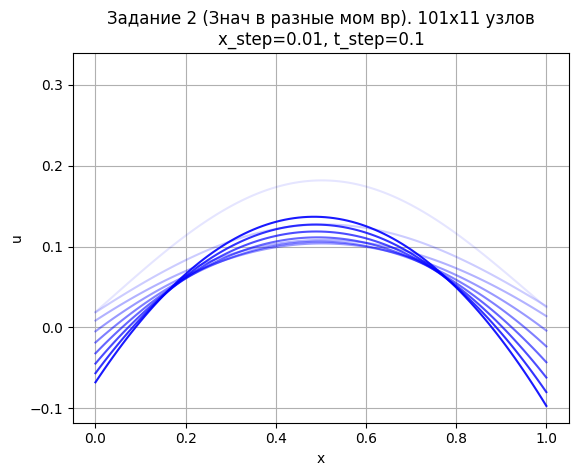

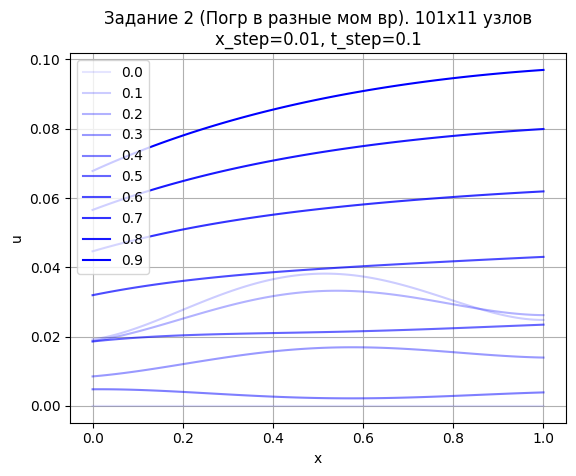

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


10__10


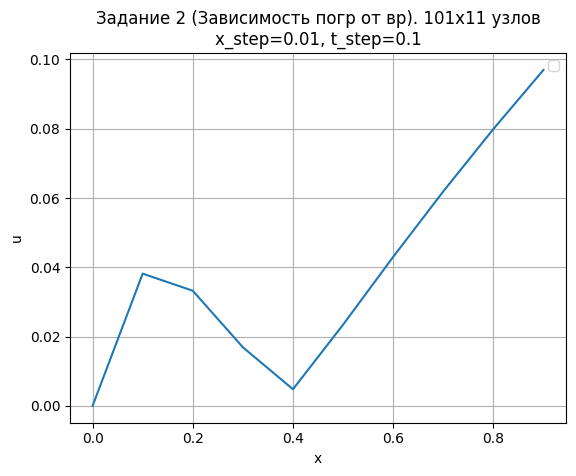

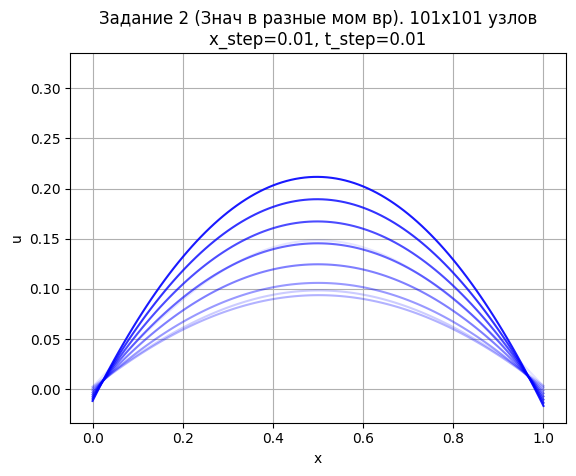

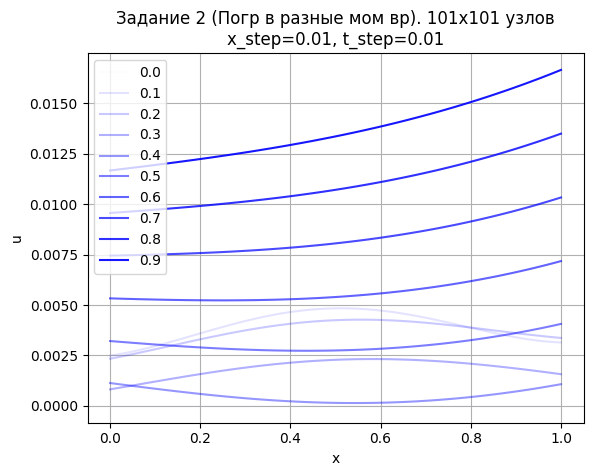

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


100__100


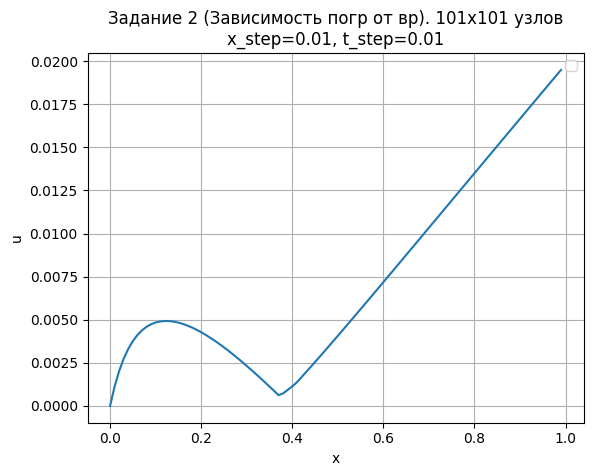

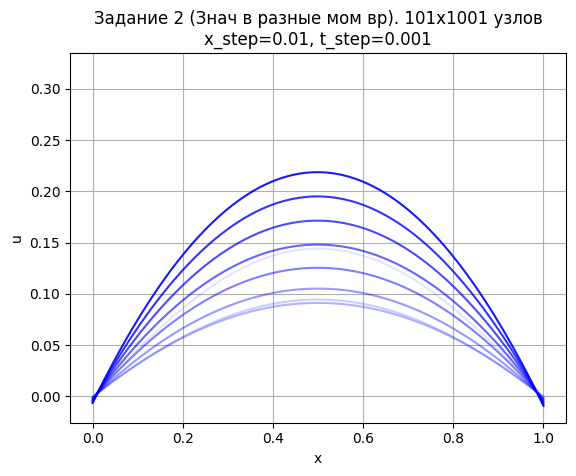

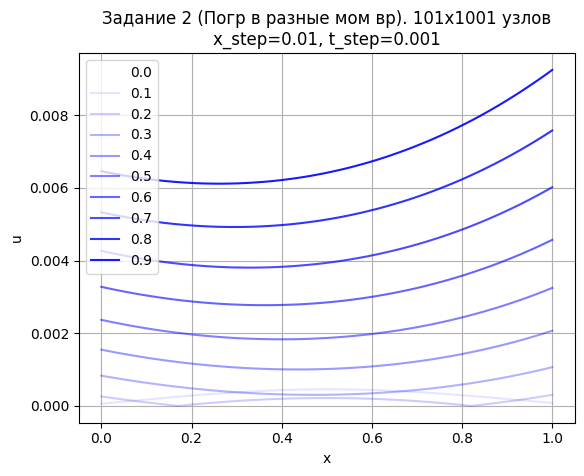

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000__1000


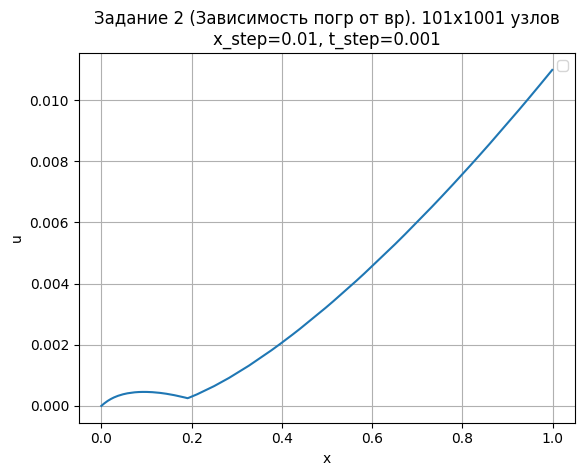

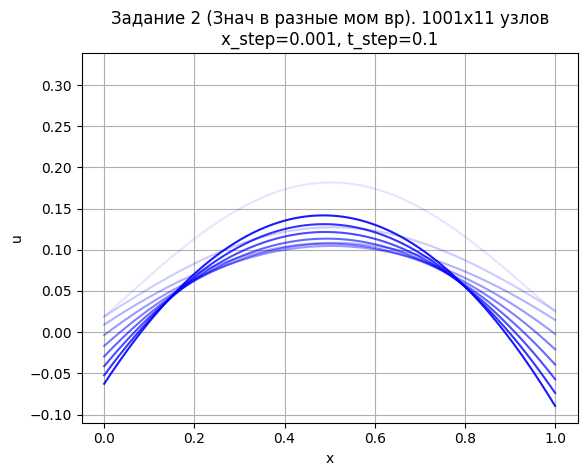

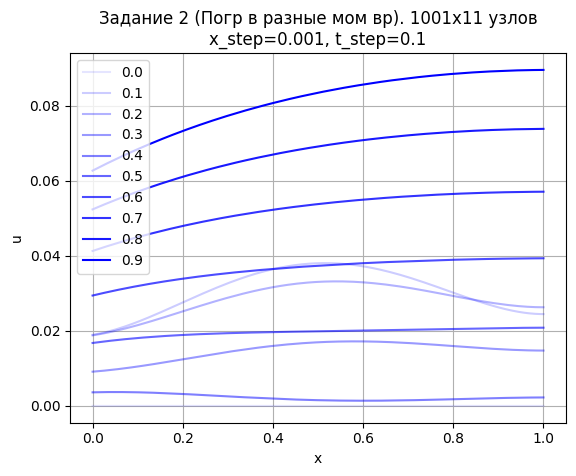

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


10__10


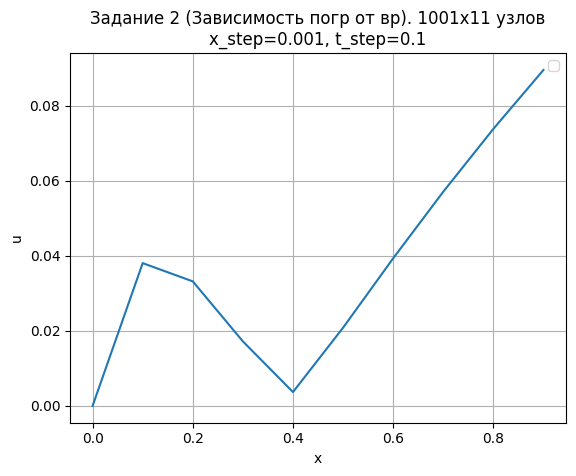

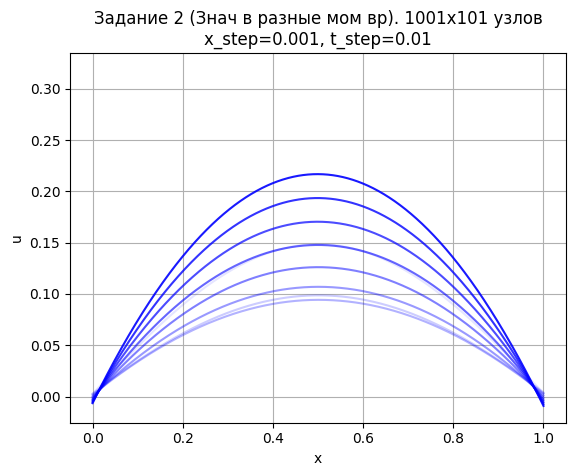

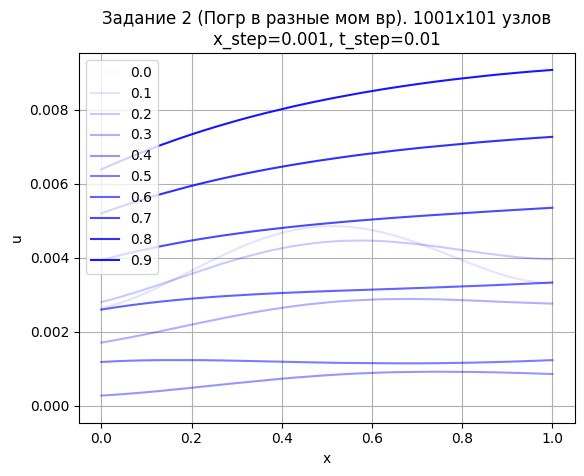

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


100__100


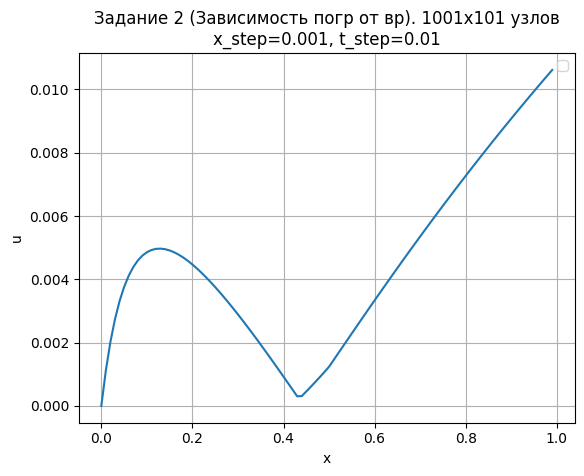

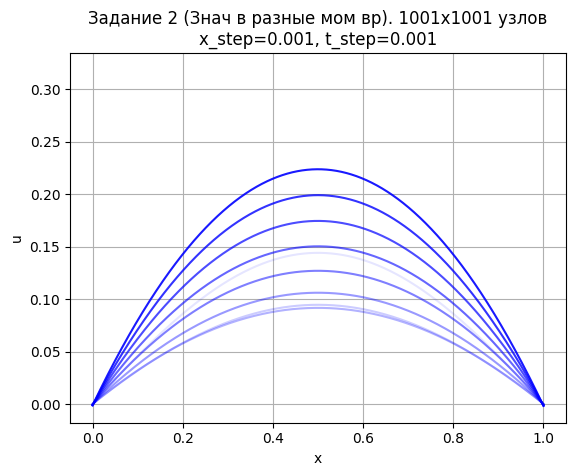

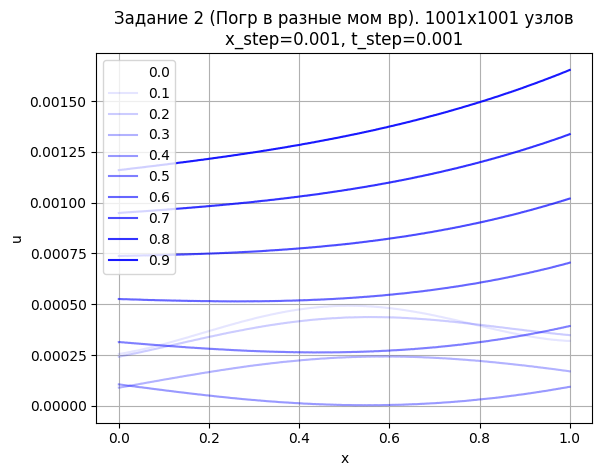

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000__1000


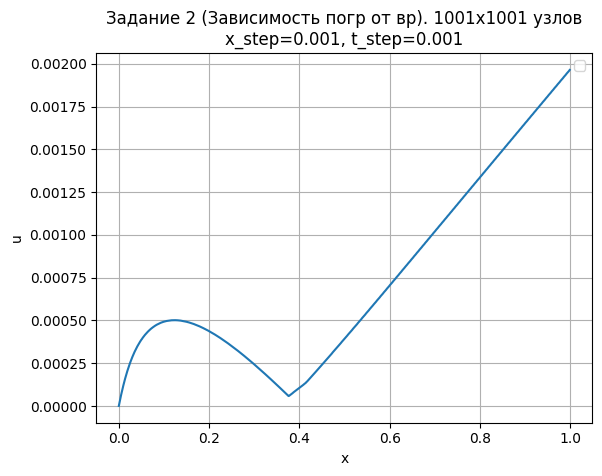

In [9]:
for i in range(3):
    for j in range(3):
        filename = f'2_{i}_{j}'
        task2(filename)

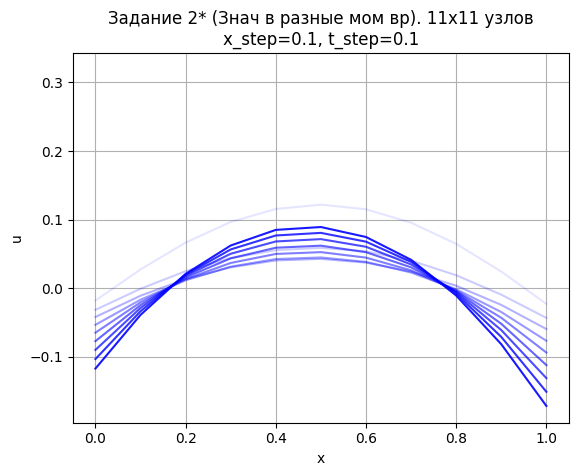

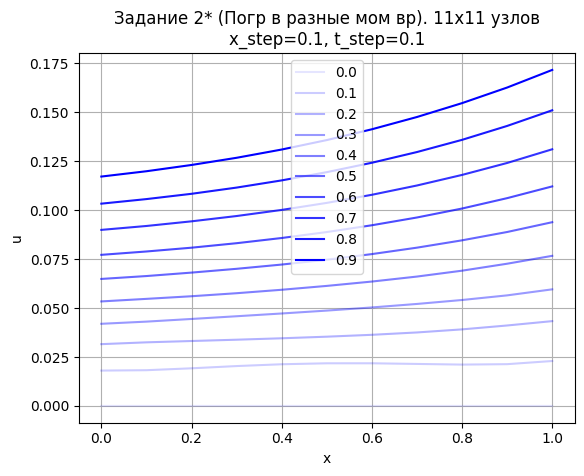

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


10__10


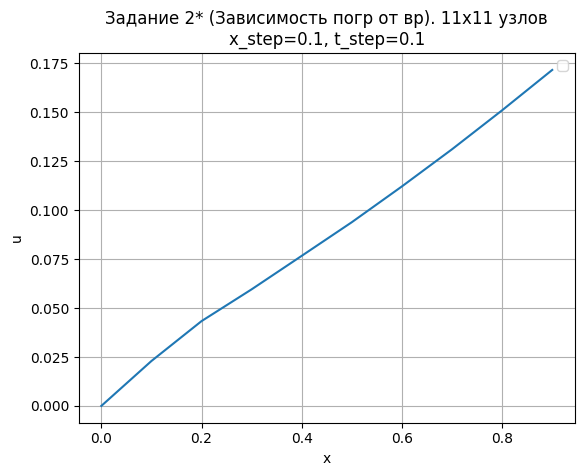

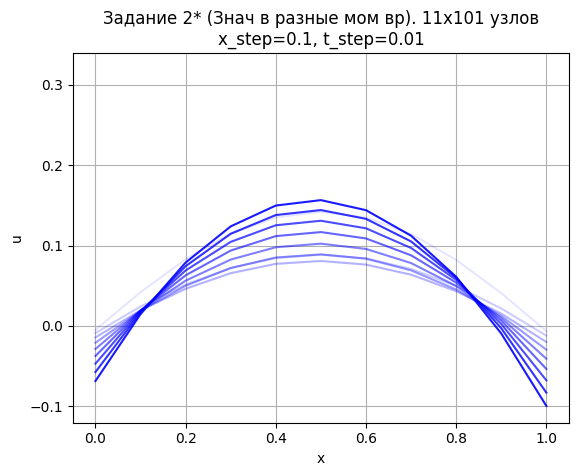

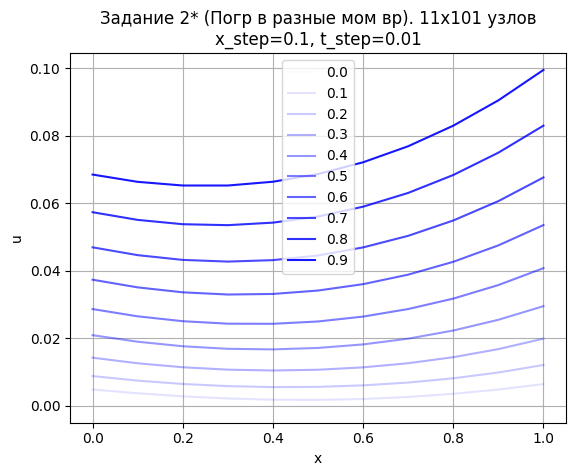

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


100__100


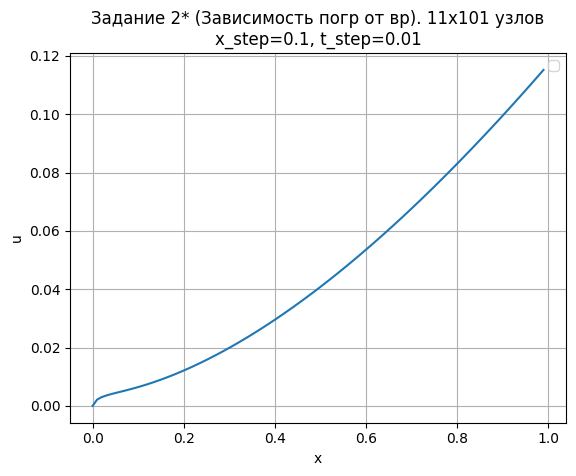

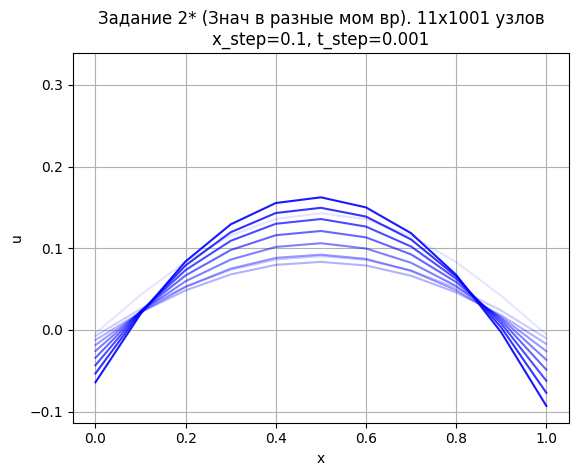

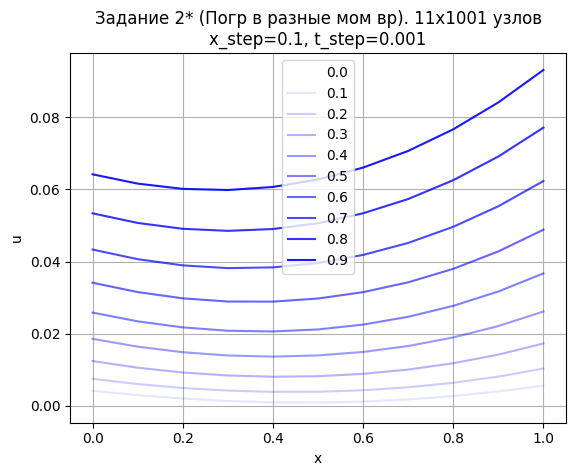

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000__1000


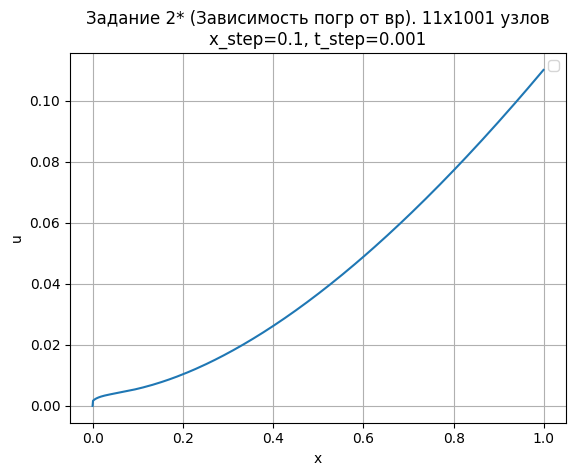

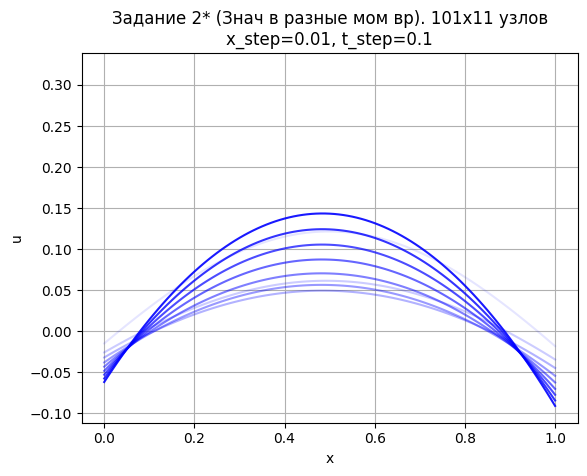

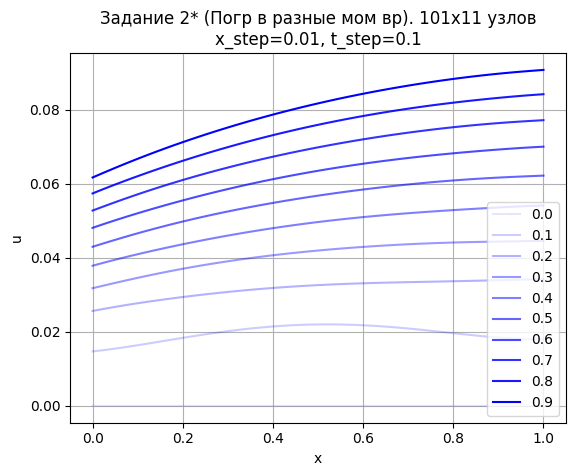

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


10__10


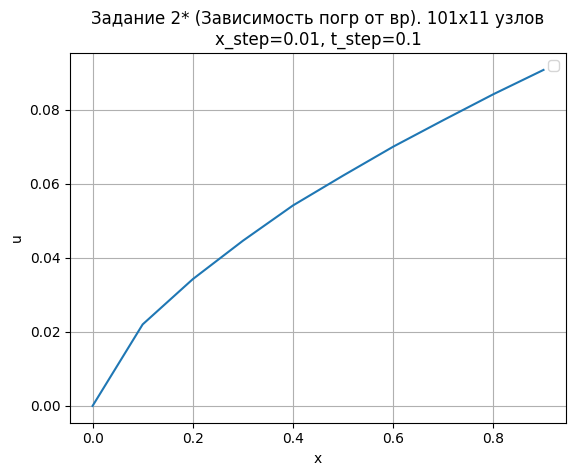

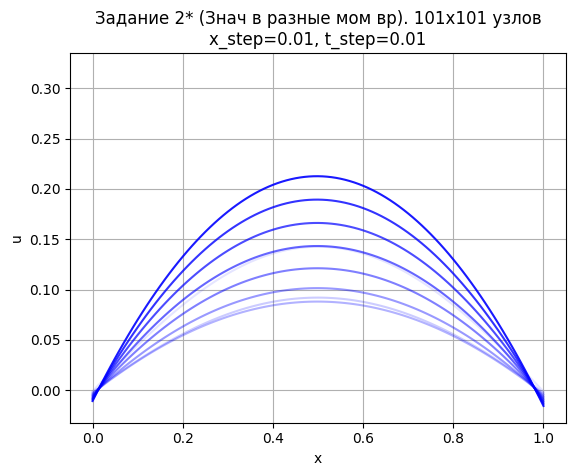

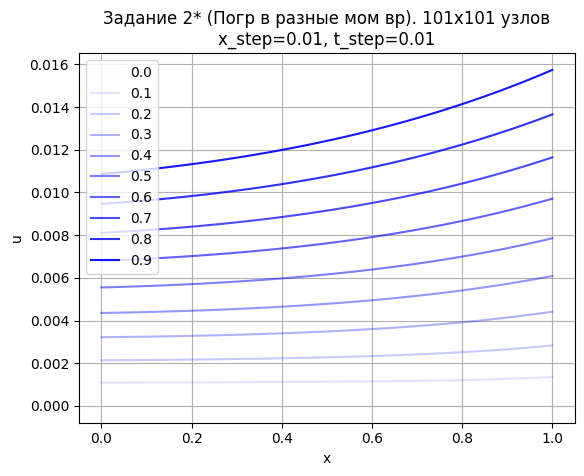

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


100__100


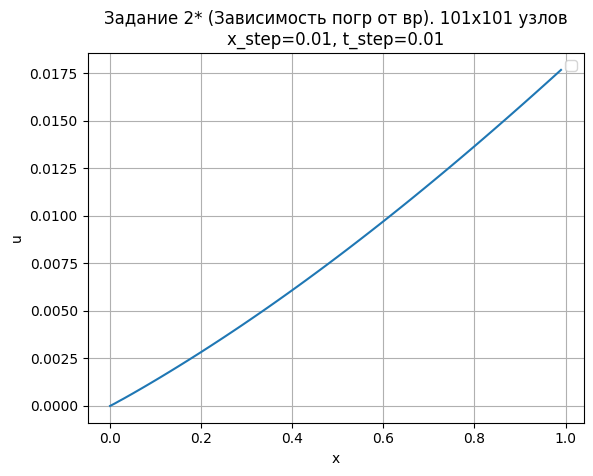

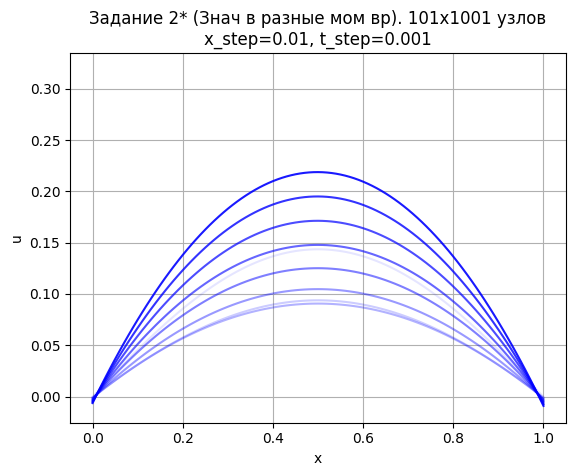

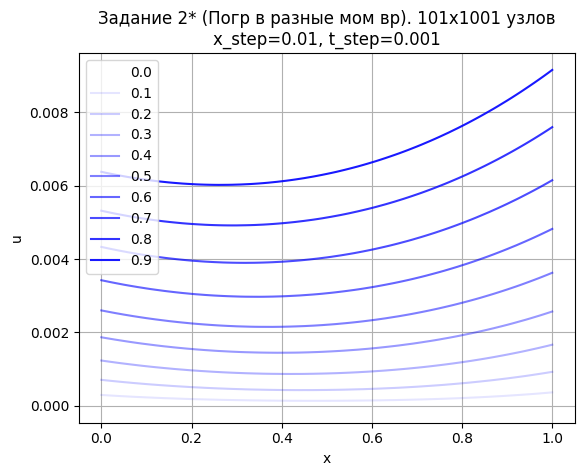

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000__1000


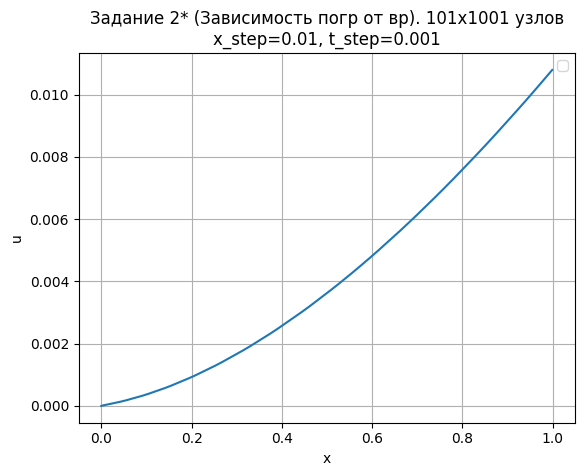

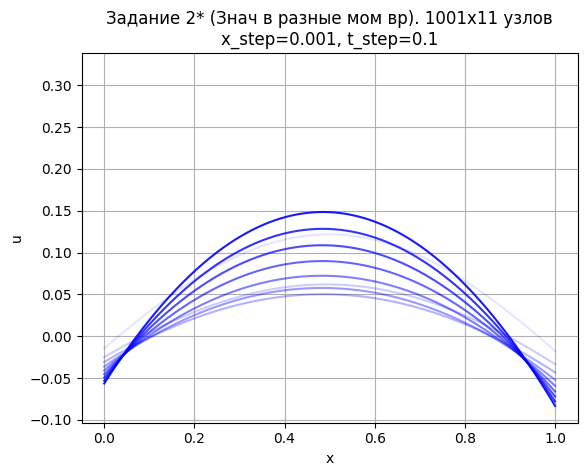

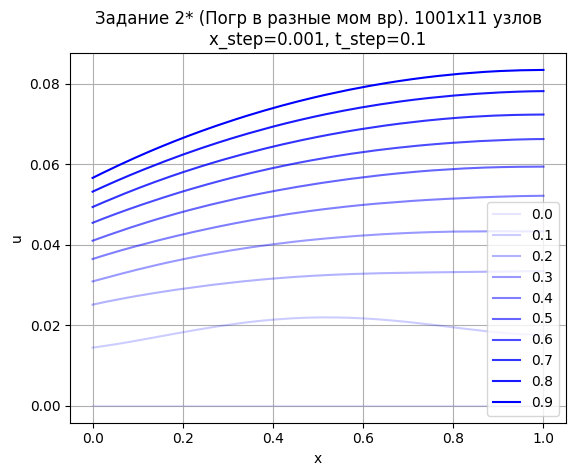

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


10__10


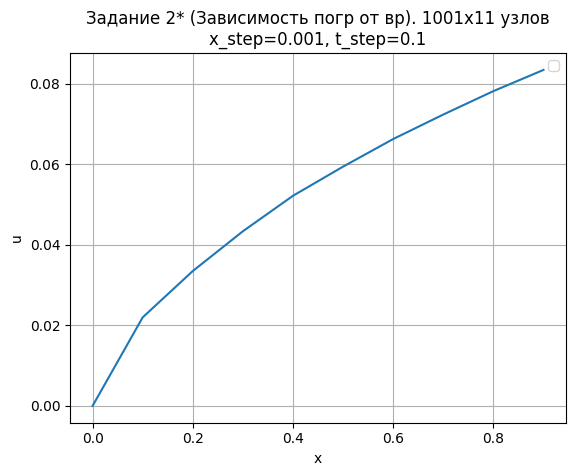

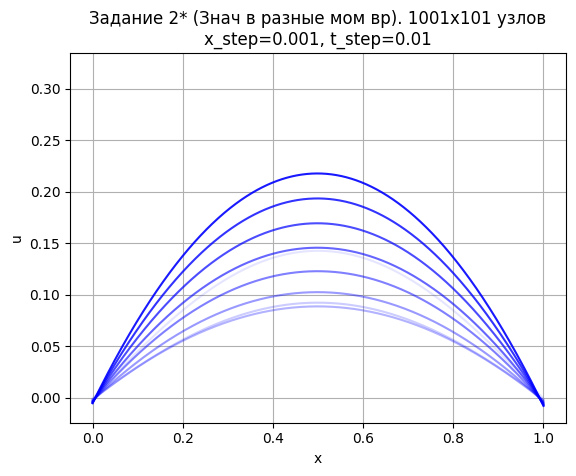

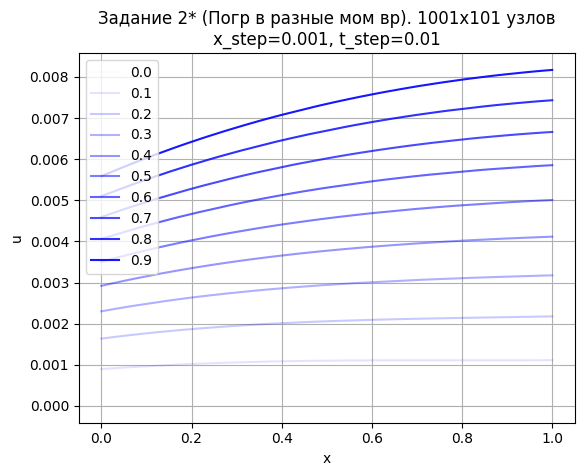

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


100__100


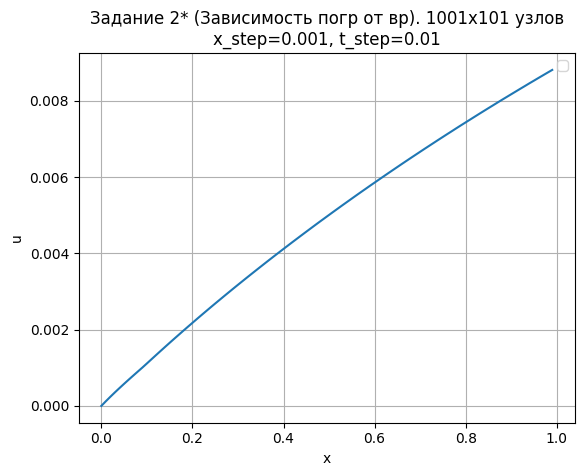

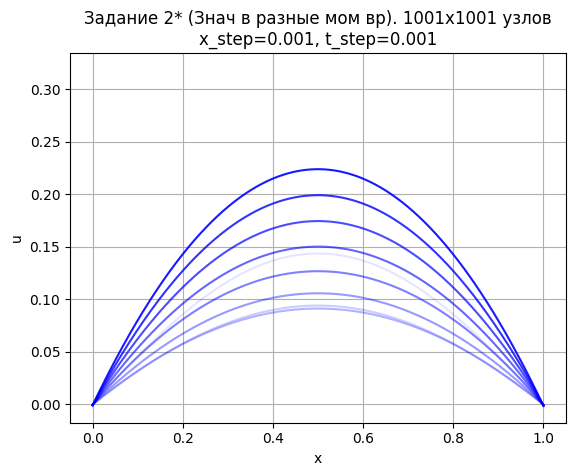

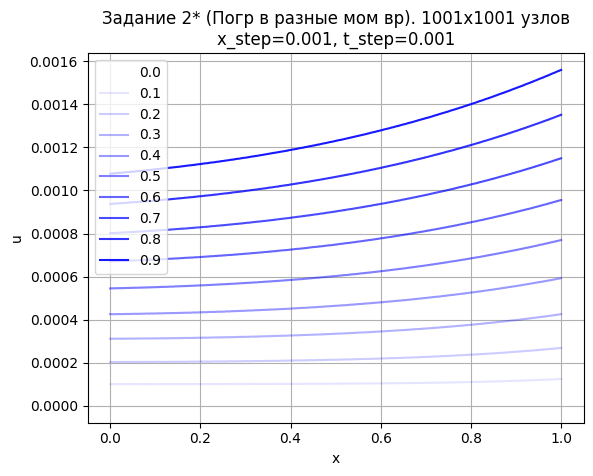

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000__1000


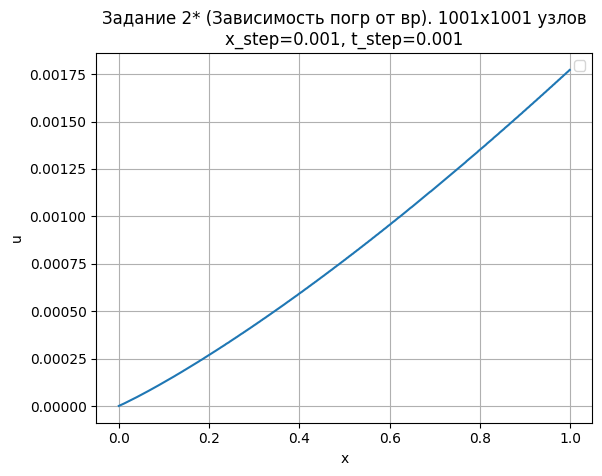

In [10]:
for i in range(3):
    for j in range(3):
        filename = f'3_{i}_{j}'
        task3(filename)